In this Machine Learning Project, we’ll build binary classification that puts movie reviews texts into one of two categories — negative or positive sentiment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data preprocessing**

##import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##import dataset

In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/Data_Sets/IMDB-Dataset.csv")
df1

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


##drop sentiment column from dataset

In [3]:
df = df1.drop('sentiment', axis = 1)
df

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
49995,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...


##print size and info of dataset

In [ ]:
print(df.shape)
print(df.info())

(50000, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  50000 non-null  object
dtypes: object(1)
memory usage: 390.8+ KB
None


##print 1st review of dataset

In [ ]:
print(df.review[1])

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


#**Text preprocessing**

##import libraries for text preprocssing

In [4]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##remove html tags

In [5]:
def remove_tags(text):
  remove = re.compile(r'<.*?>')
  return re.sub(remove, '', text)

df.review = df.review.apply(remove_tags)
df.review[1]

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

##remove special characters

In [6]:
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews

df.review = df.review.apply(special_char)
df.review[1]

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

##converting everthings to lower word

In [7]:
 def convert_lower(text):
   return text.lower()

df.review = df.review.apply(convert_lower)
df.review[1]

'a wonderful little production  the filming technique is very unassuming  very old time bbc fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  the actors are extremely well chosen  michael sheen not only  has got all the polari  but he has all the voices down pat too  you can truly see the seamless editing guided by the references to williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  a masterful production about one of the great master s of comedy and his life  the realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  it plays on our knowledge and our senses  particularly with the scenes concerning orton and halliwell and the sets  particularly of their flat with halliwell s murals decorating every surface  are terribly well done '

##remove all stopwords

In [8]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]

df.review = df.review.apply(remove_stopwords)
df.review[1]

['wonderful',
 'little',
 'production',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'sometimes',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'actors',
 'extremely',
 'well',
 'chosen',
 'michael',
 'sheen',
 'got',
 'polari',
 'voices',
 'pat',
 'truly',
 'see',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'well',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'one',
 'great',
 'master',
 'comedy',
 'life',
 'realism',
 'really',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'rather',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'every',
 'surface',
 'terribly',
 'well',
 'done']

##lemmatize or stem the words

In [9]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])

df.review = df.review.apply(lemmatize_word)
df.review[1]

'wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari voice pat truly see seamless editing guided reference williams diary entry well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done'

##after text preprocessing

In [10]:
df

,review
0,one reviewer mentioned watching 1 oz episode h...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake think zombie ...
4,petter mattei love time money visually stunnin...
...,...
49995,thought movie right good job creative original...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary school nu...
49998,going disagree previous comment side maltin on...


#**Rating the review**

##here we don't have labels i.e given review are positive or negative, so we check polarity

In [11]:
from textblob import TextBlob
textblob = TextBlob(df['review'][2])
print("Review of 3rd no. of rows:",textblob.sentiment)

Review of 3rd no. of rows: Sentiment(polarity=0.2853174603174603, subjectivity=0.676984126984127)


##add all polarity value of review in new column named as labels

In [12]:
def find_polarity(text):
  return TextBlob(text).sentiment.polarity

df['labels'] = df['review'].apply(find_polarity)
print(df)

                                                  review    labels
0      one reviewer mentioned watching 1 oz episode h...  0.039240
1      wonderful little production filming technique ...  0.125980
2      thought wonderful way spend time hot summer we...  0.285317
3      basically family little boy jake think zombie ...  0.018056
4      petter mattei love time money visually stunnin...  0.239534
...                                                  ...       ...
49995  thought movie right good job creative original...  0.324669
49996  bad plot bad dialogue bad acting idiotic direc... -0.249405
49997  catholic taught parochial elementary school nu...  0.079949
49998  going disagree previous comment side maltin on... -0.042725
49999  one expects star trek movie high art fan expec...  0.167500

[50000 rows x 2 columns]


##check whether review are positive neagtive or netural 

In [13]:
df["Expression_Label"] = np.where(df['labels'] > 0, 'positive', 'negative')
df["Expression_Label"][df['labels'] == 0 ] == 'netural'
print(df)

                                                  review  ...  Expression_Label
0      one reviewer mentioned watching 1 oz episode h...  ...          positive
1      wonderful little production filming technique ...  ...          positive
2      thought wonderful way spend time hot summer we...  ...          positive
3      basically family little boy jake think zombie ...  ...          positive
4      petter mattei love time money visually stunnin...  ...          positive
...                                                  ...  ...               ...
49995  thought movie right good job creative original...  ...          positive
49996  bad plot bad dialogue bad acting idiotic direc...  ...          negative
49997  catholic taught parochial elementary school nu...  ...          positive
49998  going disagree previous comment side maltin on...  ...          negative
49999  one expects star trek movie high art fan expec...  ...          positive

[50000 rows x 3 columns]


##check shape of netural size 

In [ ]:
text = df[df['Expression_Label'] == 0.0000]
text.shape

(0, 3)

##if there any netural value, remove netural labels

In [ ]:
#cond1 = df["Expression_Label"].isin(text["Expression_Label"])
#df.drop(df[cond1].index, inplace = True)
#print(df.shape)

#**Visualizing the data** 

##count the value of positive and negative Expression Labels

In [27]:
print(df['Expression_Label'].value_counts())

1    36838
0    13162
Name: Expression_Label, dtype: int64


##convert Expression_labels into categorical value
 positive means 1 and negative means 0

In [14]:
df.Expression_Label.replace('positive', 1, inplace = True)
df.Expression_Label.replace('negative', 0, inplace = True)
df

,review,labels,Expression_Label
0,one reviewer mentioned watching 1 oz episode h...,0.039240,1
1,wonderful little production filming technique ...,0.125980,1
2,thought wonderful way spend time hot summer we...,0.285317,1
3,basically family little boy jake think zombie ...,0.018056,1
4,petter mattei love time money visually stunnin...,0.239534,1
...,...,...,...
49995,thought movie right good job creative original...,0.324669,1
49996,bad plot bad dialogue bad acting idiotic direc...,-0.249405,0
49997,catholic taught parochial elementary school nu...,0.079949,1
49998,going disagree previous comment side maltin on...,-0.042725,0


##visualize the data of Expression_Labels

1    36838
0    13162
Name: Expression_Label, dtype: int64


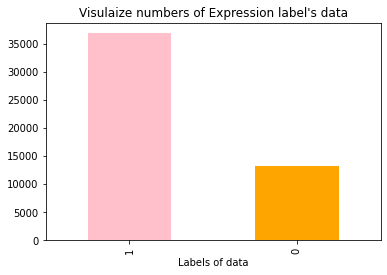

In [15]:
df['Expression_Label'].value_counts().plot(kind = "bar", color = ["pink", "orange"])
plt.xlabel("Labels of data")
plt.title("Visulaize numbers of Expression label's data")
plt.show()

##visulaize data of Expression_Label in precentage

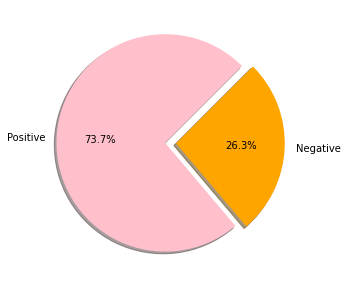

In [ ]:
fig = plt.figure(figsize = (5,5))
colors = ["pink", "orange"]
positive = df[df['Expression_Label'] == 1 ]
negative = df[df['Expression_Label'] == 0 ]
count = [positive['Expression_Label'].count(), negative['Expression_Label'].count() ]
pie = plt.pie(count, labels = ['Positive', 'Negative'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0, 0.1))

##check positive and negative word by using wordcloud

Positive Words:


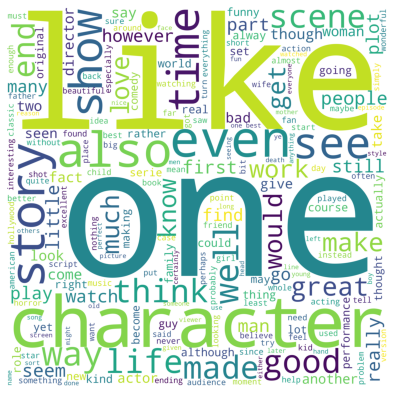

Negative words:


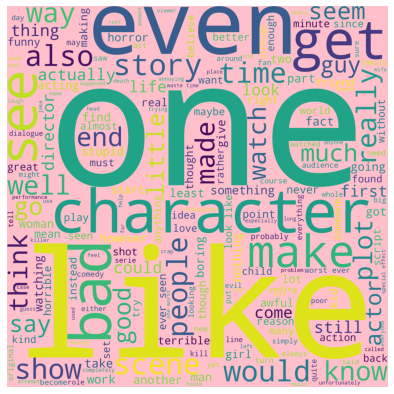

In [ ]:
from wordcloud import WordCloud
stop = set(stopwords.words('english'))

positivedata = df[df['Expression_Label'] == 1]
positivedata = positivedata['review']

negativedata = df[df['Expression_Label'] == 0]
negativedata = negativedata['review']

def wordcloud_draw(df, color = 'white'):
  words = ' '.join(df)
  cleaned_word = ' '.join([word for word in words.split()
                           if (word != 'movie' and word != 'film')])
  wordcloud = WordCloud(stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("Positive Words:")
wordcloud_draw(positivedata, 'white')

print("Negative words:")
wordcloud_draw(negativedata, 'pink')

#**Creating models** 

##create bag of words model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

x = np.array(df.iloc[:,0].values)
y = np.array(df.Expression_Label.values)

cv = CountVectorizer(max_features = 1000)
x = cv.fit_transform(df.review).toarray()

print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (50000, 1000)
y.shape =  (50000,)


##print value of x in vector form by using bag of word model

In [17]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


##train test and split the dataset

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("Train shapes : X = {}, y = {}".format(x_train.shape,y_train.shape))
print("Test shapes : X = {}, y = {}".format(x_test.shape,y_test.shape))

Train shapes : X = (40000, 1000), y = (40000,)
Test shapes : X = (10000, 1000), y = (10000,)


##create and fit logisticregressioncv model

In [24]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##predict the model

In [25]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 0, 1])

##check the accuracy of model

In [26]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print("accuracy of our model is:",score)

accuracy of our model is: 0.904


##create and fit naive bayes model

In [22]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

##predict and check accuracy of the model

In [23]:
ypg = gnb.predict(x_test)
ypm = mnb.predict(x_test)
ypb = bnb.predict(x_test)

print("Gaussian = ",accuracy_score(y_test,ypg))
print("Multinomial = ",accuracy_score(y_test,ypm))
print("Bernoulli = ",accuracy_score(y_test,ypb))

Gaussian =  0.6575
Multinomial =  0.8119
Bernoulli =  0.7875
